In [1]:
import pandas as pd

xls = pd.ExcelFile('data/sample_data.xlsx') 

correlation_input_df = pd.read_excel(xls, 'Correlation Input Sheet')

# correlation_input_df["Period"] = pd.to_datetime(correlation_input_df["Period"]).dt.year
correlation_input_df["Period"] = pd.to_datetime(correlation_input_df["Period"], format='%Y')



correlation_input_df.set_index('Period')
# correlation_input_df = correlation_input_df.reset_index(drop=True)

# correlation_input_df

,Indicator,State,LGA,Source,Value
Period,,,,,
2000-01-01,Infant Mortality rate,Abia,All,IHME,81.081218
2001-01-01,Infant Mortality rate,Abia,All,IHME,81.326104
2002-01-01,Infant Mortality rate,Abia,All,IHME,80.709217
2003-01-01,Infant Mortality rate,Abia,All,IHME,78.618660
2004-01-01,Infant Mortality rate,Abia,All,IHME,76.721278
...,...,...,...,...,...
2016-01-01,Skilled attendance at delivery or birth,Zamfara,All,NHMIS,94.000000
2017-01-01,Skilled attendance at delivery or birth,Zamfara,All,NHMIS,100.470000
2018-01-01,Skilled attendance at delivery or birth,Zamfara,All,NHMIS,124.000000


In [2]:
def segment_sheet(example_sheet, indicator):
    """
    a function that checks if an indicator is present in an example sheet,
    splits the example sheet based on the provided indicator and then,
    outputs a CSV file and determines whether time series forecasts,
    can be performed on the split data.

    Args:
    example_sheet-pandas dataframe
    indicator-string

    Return:
    indicator_df-dataFrame
    """
    
    # Declare the indicator conditional
    indicator_conditional = example_sheet['Indicator'] == indicator
    
    # Make of copy of a slice of the original dataframe
    indicator_df = example_sheet[indicator_conditional].copy()
    
    # Determine how many data points are suitable for data forecasting
    if (len(indicator_df) >= 15):
        print(f"Indicator : {indicator}, with length: {len(indicator_df)} can be forecast")
        return indicator_df
        
    else:
        return f"""Indicator : {indicator} with length: {len(indicator_df)}, cannot be forecast, choose another indicator or check spelling"""
            
    

In [3]:
# correlation_input_df = correlation_input_df[correlation_input_df['Period'] == 2001]

birth_rate = segment_sheet(correlation_input_df, 'Infant Mortality rate')

Indicator : Infant Mortality rate, with length: 1163 can be forecast


In [4]:
birth_rate_forcast = birth_rate.drop(['Indicator', 'State', 'LGA','Source'], axis=1)
birth_rate_forcast

,Period,Value
0,2000-01-01,81.081218
1,2001-01-01,81.326104
2,2002-01-01,80.709217
3,2003-01-01,78.618660
4,2004-01-01,76.721278
...,...,...
3718,2016-01-01,14.800000
3719,2017-01-01,12.700000
3720,2018-01-01,21.300000
3721,2019-01-01,14.000000


In [5]:
birth_rate_forcast = birth_rate_forcast.set_index('Period')
birth_rate_forcast


,Value
Period,
2000-01-01,81.081218
2001-01-01,81.326104
2002-01-01,80.709217
2003-01-01,78.618660
2004-01-01,76.721278
...,...
2016-01-01,14.800000
2017-01-01,12.700000
2018-01-01,21.300000


In [6]:
# birth_rate_forcast= birth_rate_forcast.convert_objects(convert_numeric=True)
# birth_rate_forcast['Value'] += 100
# birth_rate_forcast

,Value
Period,
2000-01-01,181.081218
2001-01-01,181.326104
2002-01-01,180.709217
2003-01-01,178.618660
2004-01-01,176.721278
...,...
2016-01-01,114.800000
2017-01-01,112.700000
2018-01-01,121.300000


<AxesSubplot:xlabel='Period'>

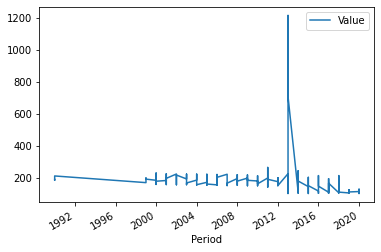

In [7]:
birth_rate_forcast.plot()

In [8]:
# Import required module
from statsmodels.tsa.seasonal import seasonal_decompose

# Multiplicative Decomposition 
result_mul = seasonal_decompose(birth_rate_forcast['Value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
# result_add = seasonal_decompose(birth_rate_forcast['Value'], model='additive', extrapolate_trend='freq')

# birth_rate_forcast['Value']

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

Contents of the Dataframe : 
   Name  Age    City  Experience
A  Jack   34  Sydney           5
B  Riti   31   Delhi           7
C  Aadi   16  London          11
D  Mark   41   Delhi          12
Modified Dataframe : 
   Name  Age    City  Experience
A  Jack   34  Sydney           5
B  Riti   31   Delhi           7


In [ ]:
birth_rate_forcast
test = birth_rate_forcast.iloc[:-3, :]

In [ ]:
stepwise_fit = auto_arima(DPT3_forecast['Value'].iloc[0:21],
                          start_p=0, start_q=0,
                          max_p=3, max_q=3, m=12, 
                          start_P=0, seasonal=False,
                          d=1, D=None, trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

In [ ]:
X = birth_rate_forcast.values

X = X.astype('float32')

history = [value for value in X]

model = ARIMA(history, order=(0, 0, 0))
model_fit = model.fit()

y_hat_list = []
for i in range(len(history)):
    y_hat = model_fit.forecast()[i] 
    y_hat_list.append(y_hat)
    print('For Year %d --> Predicted = %.3f' % (year, y_hat))

In [10]:
from datetime import date

today = date.today()
print(today)

2022-06-02


In [14]:
import datetime as dt
from dateutil.relativedelta import relativedelta

three_yrs_ago = dt.datetime.now() - relativedelta(years=3)
print(three_yrs_ago.date())

2019-06-02


In [25]:
import datetime as dt
from dateutil.relativedelta import relativedelta

three_yrs_ago = dt.datetime.now() - relativedelta(years=3)
today = dt.date.today()
diff = today - three_yrs_ago.date()
print((diff.days / 365) > 2)

True
